In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
temp_df=pd.read_csv("/content/cleaned_data.csv")

In [4]:
df=temp_df.copy()

In [5]:
df.head()

,name,price,brand,no_of_votes,rating,os,utility,thickness,weight,warranty,...,num_of_cell,battery_capacity,pixel_width,pixel_height,usb3,usb2,type_c,processor_brand,processor_model,processor_gen
0,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / ...,25990.0,Acer,1086,4.10,Windows,Everyday Use,21.6,1.50,1.0,...,2.0,45.50,1920.0,1080.0,0,1,0,Intel,i3,11th
1,Wings Nuvobook V1 Laptop (11th Gen Core i5/ 8G...,34990.0,Wings,69,4.70,Windows,Business,NaN,1.60,1.0,...,NaN,17.85,1080.0,1920.0,0,1,0,Intel,i5,11th
2,MSI Thin GF63 12HW-012IN Gaming Laptop (12th G...,49990.0,MSI,172,4.25,Windows,Performance,21.7,1.86,2.0,...,3.0,51.00,1920.0,1080.0,3,0,0,Intel,i5,12th
3,Acer Nitro V ANV15-51 Gaming Laptop (13th Gen ...,79745.0,Acer,75,4.50,Windows,Gaming,25.9,2.60,1.0,...,NaN,NaN,1920.0,1080.0,3,0,0,Intel,i5,13th
4,Acer Aspire Lite AL15-51 Laptop (AMD Ryzen 5 5...,35990.0,Acer,162,4.00,Windows,Performance,19.7,1.59,1.0,...,3.0,36.00,1920.0,1080.0,0,1,0,AMD,5,5th


In [6]:
df.columns

Index(['name', 'price', 'brand', 'no_of_votes', 'rating', 'os', 'utility',
       'thickness', 'weight', 'warranty', 'display_size', 'ppi',
       'aspect_ratio', 'antiglare', 'touch_screen', 'ram', 'hdd', 'ssd',
       'graphic', 'cache', 'thread', 'core', 'hdmi', 'mcr', 'wifi',
       'bluetooth', 'backlit_keyboard', 'inbuilt_microphone', 'thunderbolt',
       'fingerprint_sensor', 'ethernet', 'display_port', 'camera',
       'num_of_cell', 'battery_capacity', 'pixel_width', 'pixel_height',
       'usb3', 'usb2', 'type_c', 'processor_brand', 'processor_model',
       'processor_gen'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                798 non-null    object 
 1   price               798 non-null    float64
 2   brand               798 non-null    object 
 3   no_of_votes         798 non-null    int64  
 4   rating              798 non-null    float64
 5   os                  798 non-null    object 
 6   utility             792 non-null    object 
 7   thickness           613 non-null    float64
 8   weight              720 non-null    float64
 9   warranty            793 non-null    float64
 10  display_size        798 non-null    float64
 11  ppi                 798 non-null    int64  
 12  aspect_ratio        798 non-null    object 
 13  antiglare           798 non-null    int64  
 14  touch_screen        798 non-null    int64  
 15  ram                 798 non-null    int64  
 16  hdd     

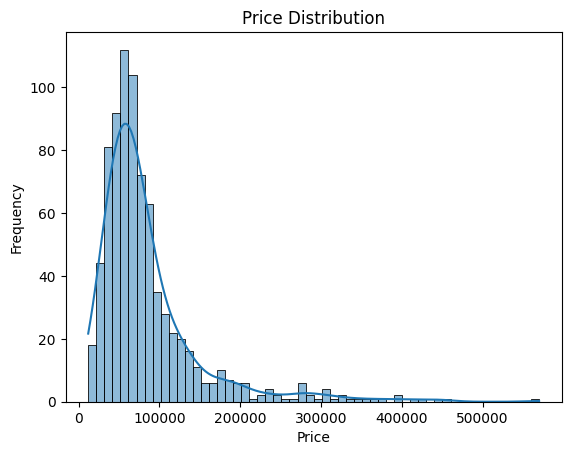

In [18]:
sns.histplot(df['price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

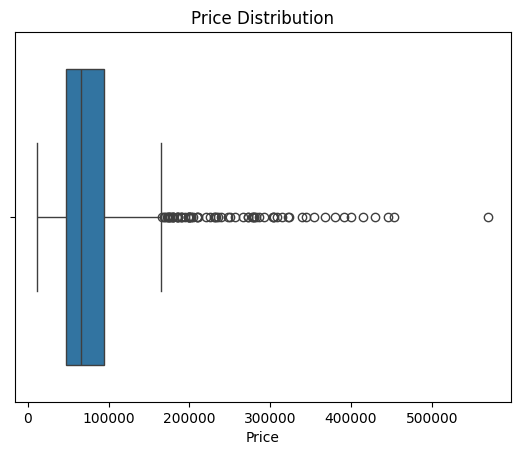

In [20]:
sns.boxplot(x=df['price'])
plt.xlabel('Price')
plt.title('Price Distribution')
plt.show()

In [21]:
df["price"].describe()

,price
count,798.000000
mean,85206.958647
std,66340.745296
min,11990.000000
25%,47990.000000
50%,65745.000000
75%,94990.000000
max,569990.000000


In [23]:
print(df["price"].skew())
print(df["price"].kurt())

2.8190422013701375
10.531844203684056


In [26]:
quantiles=df["price"].quantile([0.10,0.25,0.5,0.75,0.95,0.99])
quantiles

,price
0.10,34990.00
0.25,47990.00
0.50,65745.00
0.75,94990.00
0.95,210171.35
0.99,367962.00


In [28]:
q1=quantiles[0.25]
q3=quantiles[0.75]
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound)
print(upper_bound)

-22510.0
165490.0


In [30]:
outliers=df[(df["price"]<lower_bound) | (df["price"]>upper_bound)]
outliers.shape

(71, 43)

In [32]:
outliers["price"].describe()

,price
count,71.000000
mean,257018.464789
std,85109.434334
min,165601.000000
25%,189994.500000
50%,231746.000000
75%,303240.000000
max,569990.000000


<Axes: xlabel='price', ylabel='Count'>

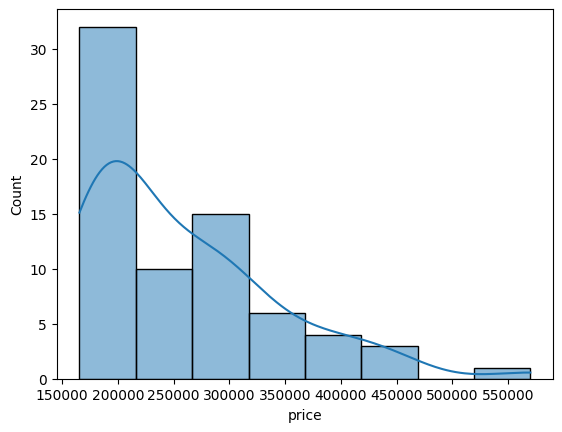

In [34]:
sns.histplot(outliers["price"],kde=True)

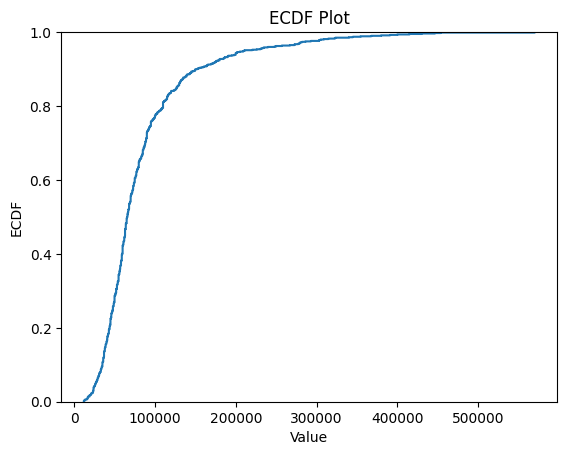

In [35]:
sns.ecdfplot(df["price"])
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.title('ECDF Plot')
plt.show()

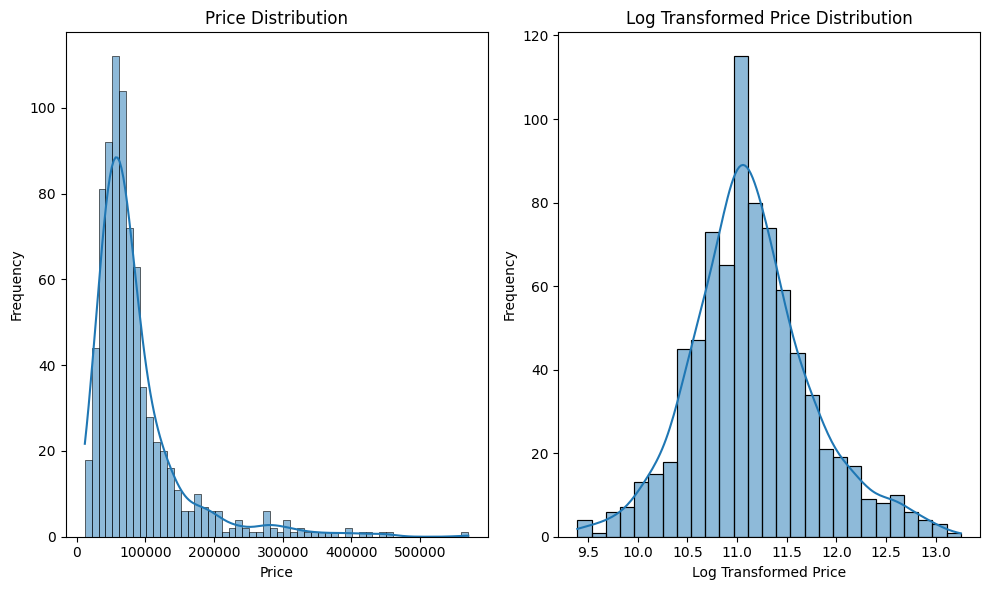

In [36]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.histplot(df["price"],kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')

plt.subplot(1,2,2)
sns.histplot(np.log1p(df["price"]),kde=True)
plt.xlabel('Log Transformed Price')
plt.ylabel('Frequency')
plt.title('Log Transformed Price Distribution')

plt.tight_layout()
plt.show()

## Observations
- Price column is right skewed.

# 2.Brand column

<Axes: xlabel='brand'>

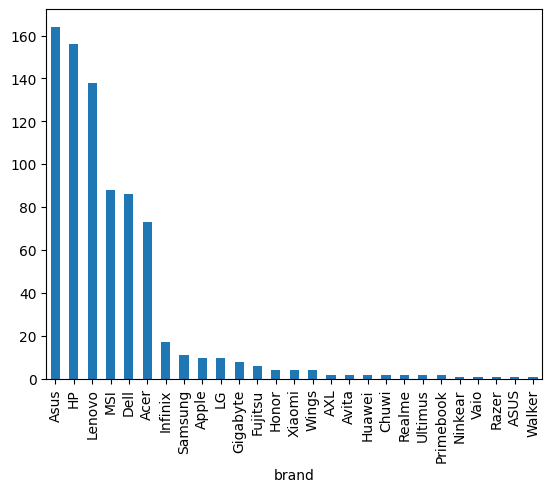

In [43]:
df["brand"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

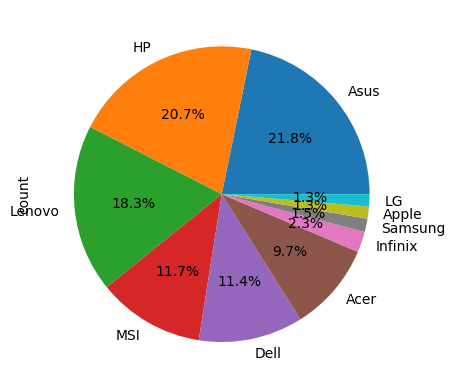

In [47]:
df["brand"].value_counts().head(10).plot(kind="pie",autopct="%0.1f%%")

In [48]:
df["brand"].isnull().sum()

0

# 3.No of votes

In [51]:
df["no_of_votes"].isnull().sum()

0

In [50]:
df["no_of_votes"].describe()

,no_of_votes
count,798.000000
mean,284.867168
std,1086.814084
min,51.000000
25%,74.000000
50%,94.000000
75%,122.000000
max,14917.000000


<Axes: xlabel='no_of_votes', ylabel='Count'>

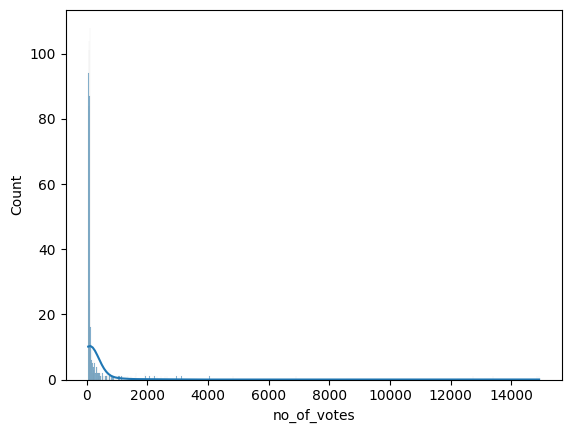

In [54]:
sns.histplot(df["no_of_votes"],kde=True)

<Axes: xlabel='no_of_votes', ylabel='Count'>

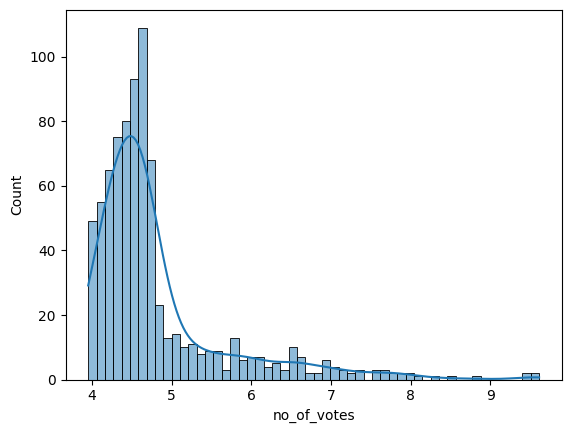

In [56]:
sns.histplot(np.log1p(df["no_of_votes"]),kde=True)

<Axes: xlabel='no_of_votes', ylabel='Proportion'>

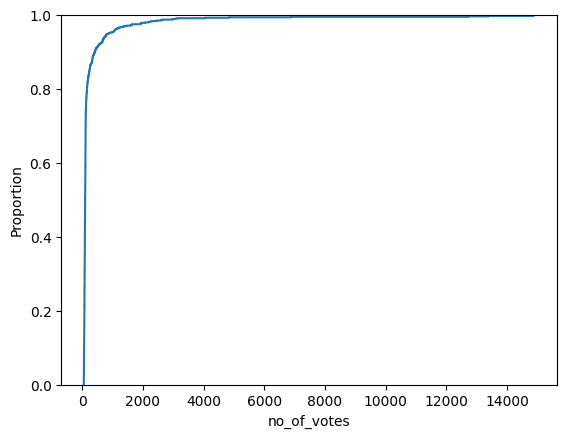

In [57]:
sns.ecdfplot(df["no_of_votes"])

<Axes: xlabel='no_of_votes'>

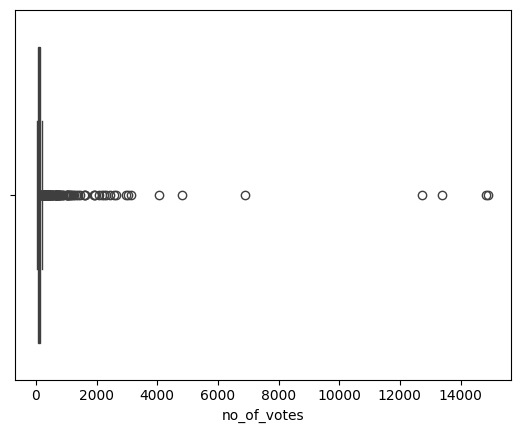

In [55]:
sns.boxplot(x=df["no_of_votes"])

# 4.Rating

In [59]:
df["rating"].isnull().sum()

0

In [61]:
df["rating"].describe()

,rating
count,798.000000
mean,4.332331
std,0.230340
min,3.550000
25%,4.150000
50%,4.300000
75%,4.500000
max,4.750000


<Axes: xlabel='rating', ylabel='Count'>

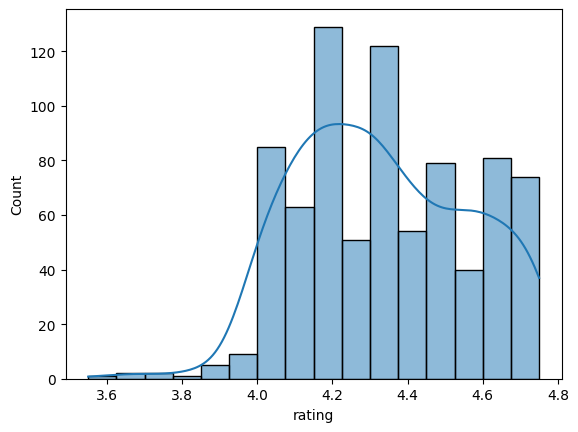

In [60]:
sns.histplot(df["rating"],kde=True)

### observations
- the values lie between 3.5-4.75
- make it a categorigal column
  - 3.5-4.0->below average
  - 4.0-4.5-> Average
  - more than 4.5->good

# 5.os

In [63]:
df["os"].isnull().sum()

0

<Axes: xlabel='os'>

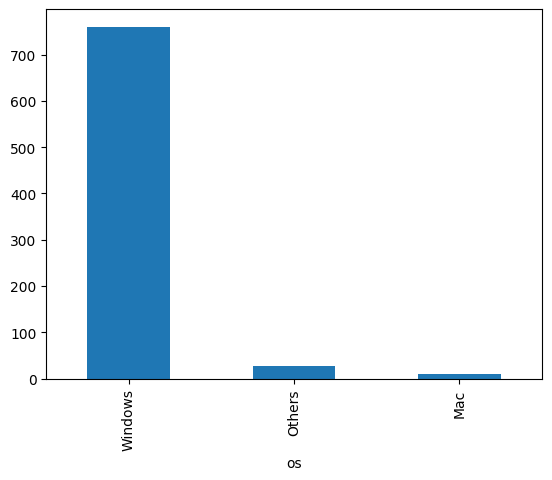

In [64]:
df["os"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

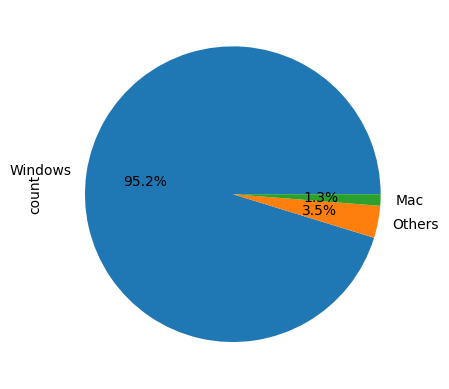

In [68]:
df["os"].value_counts().plot(kind="pie",autopct="%0.1f%%")

# 6.Utility

In [69]:
df["utility"].isnull().sum()

6

<Axes: xlabel='utility'>

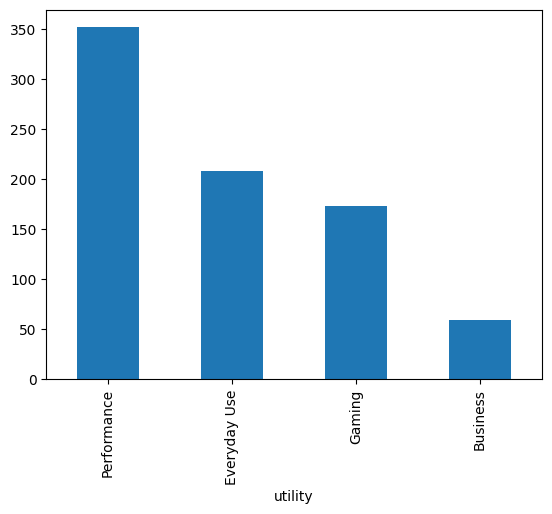

In [71]:
df["utility"].value_counts().plot(kind="bar")

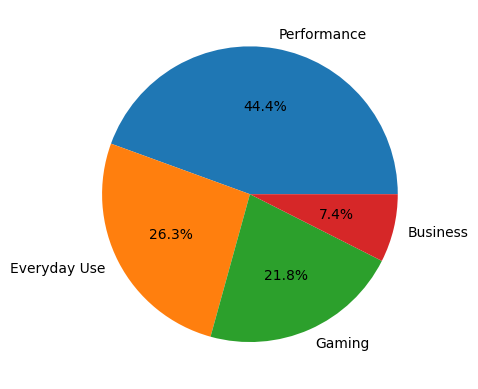

In [13]:
column=df["utility"].value_counts()
plt.pie(column,labels=column.index,autopct="%0.1f%%")
plt.show()

### observations
- There are 6 null values in this


# 7.Thickness

In [74]:
df["thickness"].isnull().sum()

185

In [75]:
df["thickness"].describe()

,thickness
count,613.000000
mean,26.717129
std,40.308621
min,1.950000
25%,17.900000
50%,19.800000
75%,22.500000
max,376.170000


<Axes: >

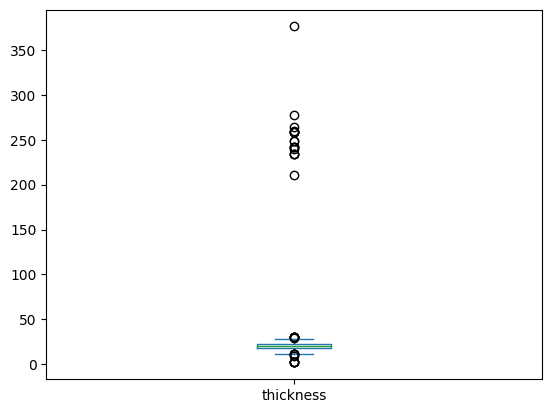

In [79]:
df["thickness"].plot(kind="box")

In [80]:
df["thickness"].skew()

5.727682370404464

In [81]:
df["thickness"].kurt()

32.443346360002394

In [82]:
quantiles=df["thickness"].quantile([0.10,0.25,0.5,0.75,0.95,0.99])
q1=quantiles[0.25]
q3=quantiles[0.75]
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound)
print(upper_bound)

10.999999999999996
29.400000000000002


In [83]:
outliers=df[(df["thickness"]<lower_bound) | (df["thickness"]>upper_bound)]
outliers.shape

(34, 43)

In [86]:
outliers["thickness"].describe()

,thickness
count,34.000000
mean,142.285294
std,124.076100
min,1.950000
25%,10.900000
50%,222.700000
75%,249.100000
max,376.170000


### observations
- There are 185 null values in this
- outliers are present
- lower bound= 11mm
- upper bound=30mm
- Here we can create three categories thin,medium and thick

# 8.Weight

In [93]:
df["weight"].isnull().sum()

78

In [94]:
df["weight"].describe()

,weight
count,720.000000
mean,1.834681
std,0.410237
min,1.000000
25%,1.570000
50%,1.740000
75%,2.140000
max,3.860000


<Axes: xlabel='weight', ylabel='Count'>

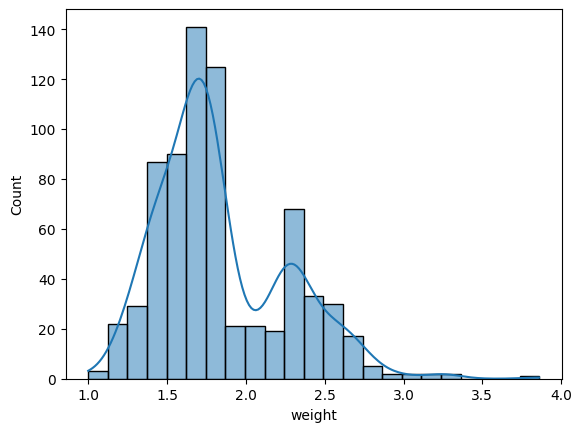

In [95]:
sns.histplot(df["weight"],kde=True)

<Axes: xlabel='weight'>

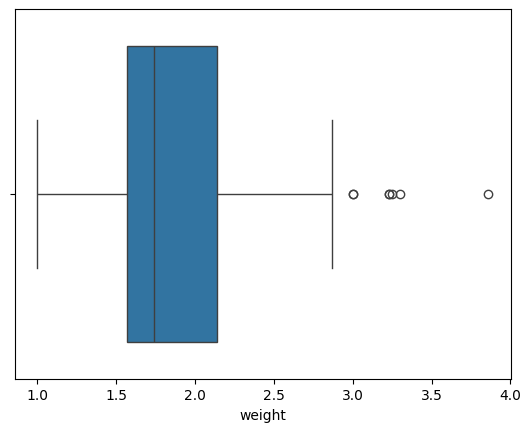

In [96]:
sns.boxplot(x=df["weight"])

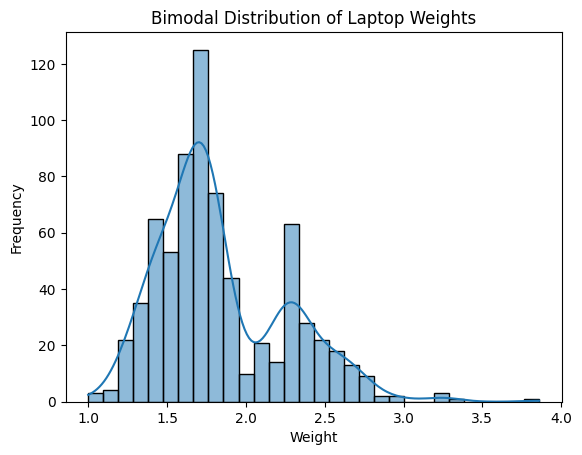

In [99]:
sns.histplot(df["weight"], bins=30, kde=True)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Bimodal Distribution of Laptop Weights')
plt.show()

### observations
- 78 null values
- We can create three categories from it lite , medium and heavy

# 9.Warranty

In [101]:
df["warranty"].isnull().sum()

5

<Axes: ylabel='count'>

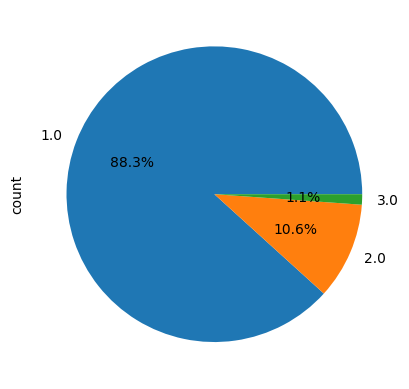

In [103]:
df["warranty"].value_counts().plot(kind="pie",autopct="%0.1f%%")

### observations
- There are 5 null values
- Max laptops give 1 year warranty

# 10.Display Size

In [104]:
df["display_size"].isnull().sum()

0

In [105]:
df["display_size"].describe()

,display_size
count,798.000000
mean,15.191805
std,0.945309
min,11.600000
25%,14.000000
50%,15.600000
75%,15.600000
max,18.000000


<Axes: xlabel='display_size', ylabel='Count'>

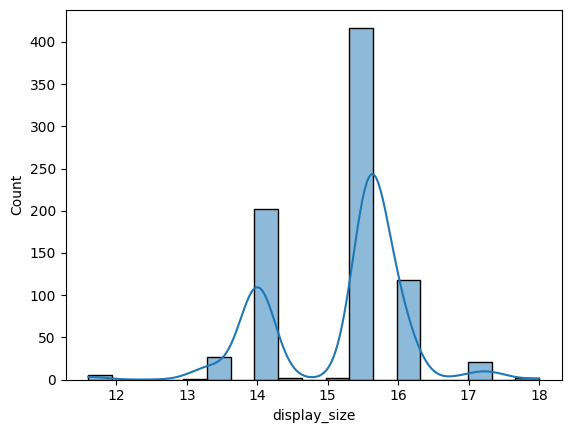

In [106]:
sns.histplot(df["display_size"],kde=True)

### Observations
- Here we clearly see the categories of screen size
- we can make three categories [small,medium and large]

# 11.PPI

In [108]:
df["ppi"].isnull().sum()

0

In [109]:
df["ppi"].describe()

,ppi
count,798.000000
mean,159.058897
std,37.956163
min,100.000000
25%,141.000000
50%,141.000000
75%,157.000000
max,323.000000


<Axes: xlabel='ppi', ylabel='Count'>

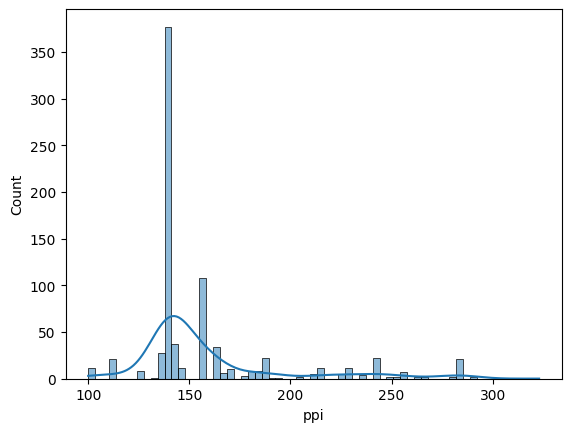

In [110]:
sns.histplot(df["ppi"],kde=True)

<Axes: xlabel='ppi'>

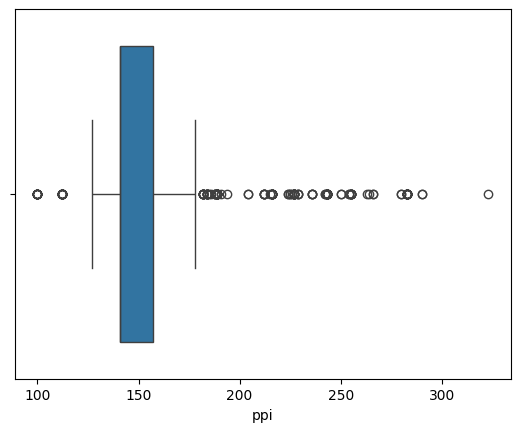

In [111]:
sns.boxplot(x=df["ppi"])

In [112]:
quantiles=df["ppi"].quantile([0.1,0.25,0.50,0.75,0.90,0.99])
quantiles

,ppi
0.10,141.0
0.25,141.0
0.50,141.0
0.75,157.0
0.90,225.3
0.99,283.0


In [113]:
q1=quantiles[0.25]
q3=quantiles[0.75]
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound)
print(upper_bound)

117.0
181.0


In [115]:
outliers=df[(df["ppi"]<lower_bound) | (df["ppi"]>upper_bound)]
outliers.shape

(175, 43)

### observations
- we can create categories here low , medium and high

# 12.Aspect Ratio

In [116]:
df["aspect_ratio"].isnull().sum()

0

<Axes: ylabel='count'>

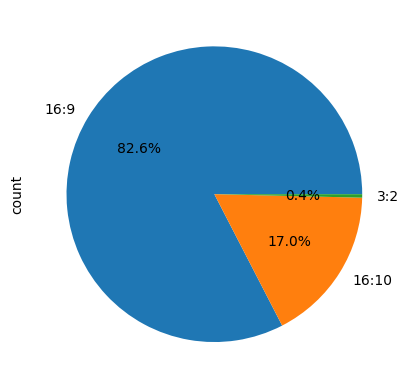

In [118]:
df["aspect_ratio"].value_counts().plot(kind="pie",autopct="%0.1f%%")

### Observations
- Maximum laptops have 16:9

# 13."antiglare","touch_screen","hdmi","mcr","bluetooth",
#"backlit_keyboard","inbuilt_microphone","thunderbolt",
# "fingerprint_sensor","ethernet","display_port"


In [120]:
col_list=["antiglare","touch_screen","hdmi","mcr","bluetooth","backlit_keyboard","inbuilt_microphone","thunderbolt","fingerprint_sensor","ethernet","display_port"]


antiglare
0


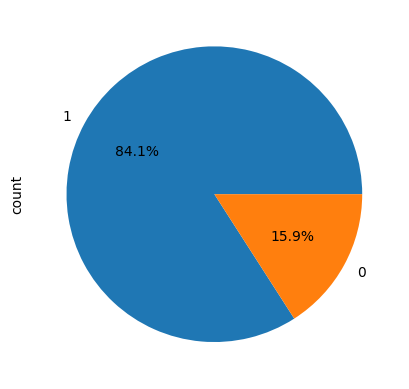

touch_screen
0


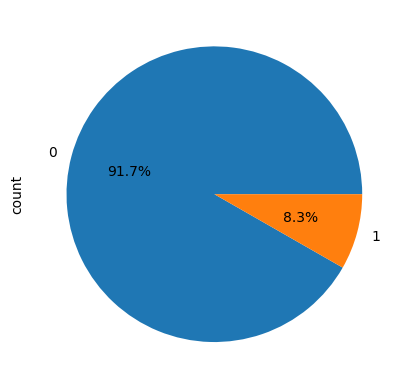

hdmi
0


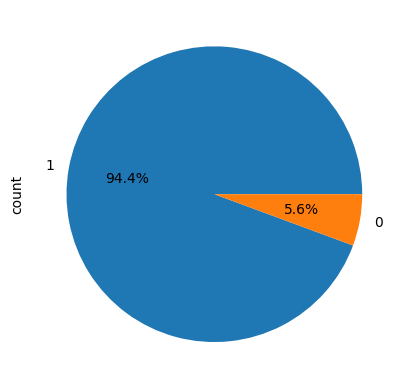

mcr
0


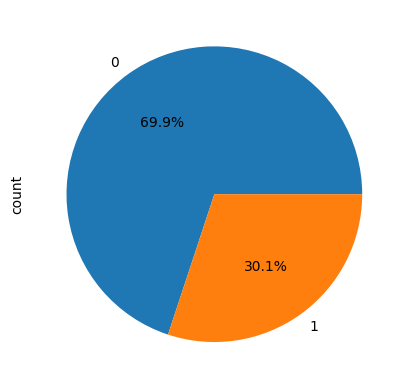

bluetooth
0


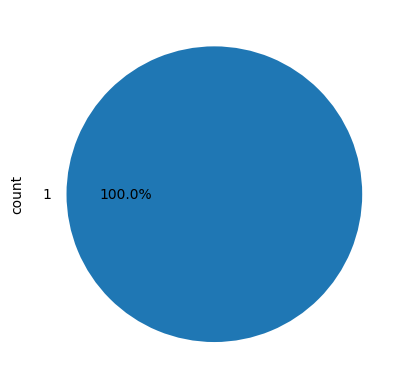

backlit_keyboard
0


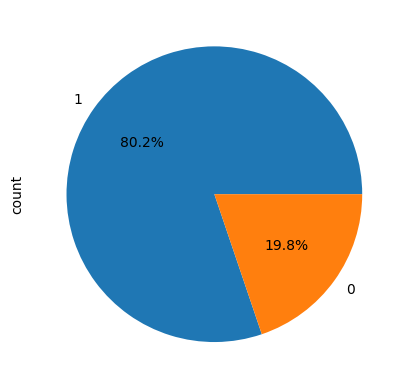

inbuilt_microphone
0


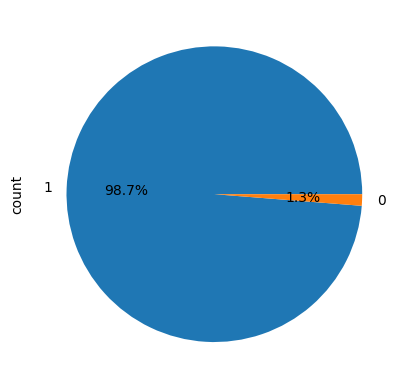

thunderbolt
0


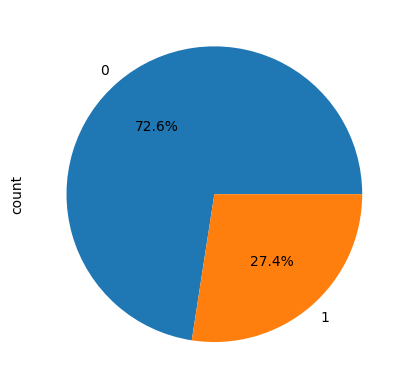

fingerprint_sensor
0


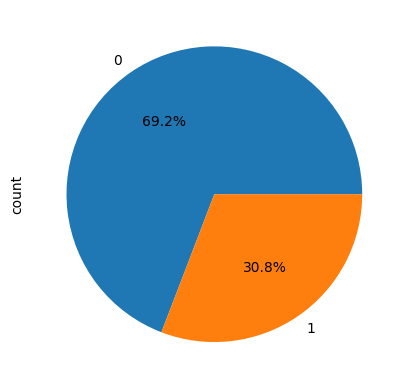

ethernet
0


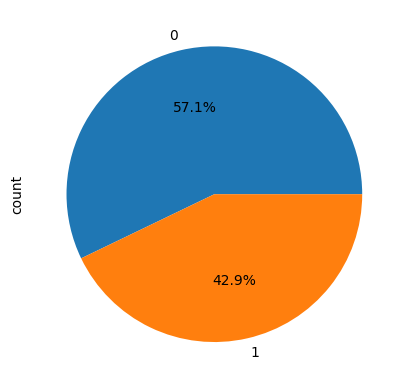

display_port
0


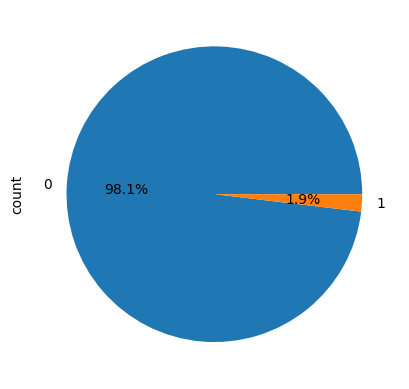

In [123]:
for i in col_list:
  df[i].value_counts().plot(kind="pie",autopct="%0.1f%%")
  print(i)
  print(df[i].isnull().sum())
  plt.show()

# 14.Ram

In [124]:
df["ram"].isnull().sum()

0

<Axes: xlabel='ram'>

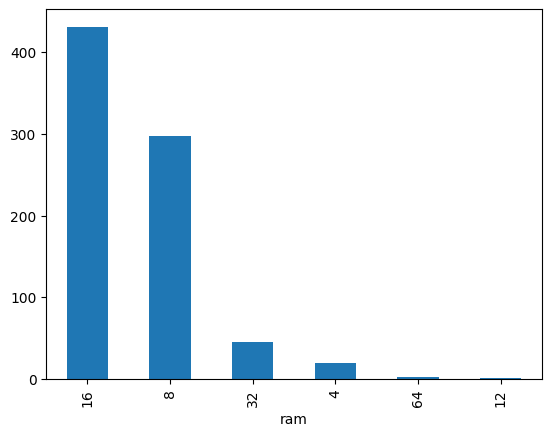

In [128]:
df["ram"].value_counts().plot(kind="bar")

<Axes: ylabel='proportion'>

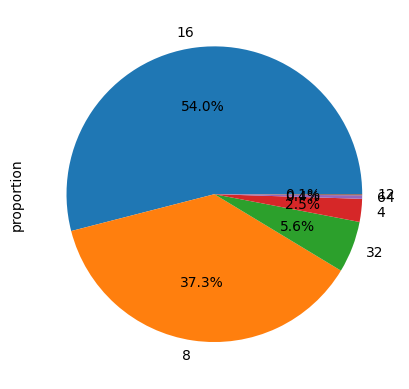

In [130]:
df["ram"].value_counts(normalize=True).plot(kind="pie",autopct="%0.1f%%")

### Observations
- Maximum no. of laptops have 16gb of ram and least no. of laptops have 12 gb of ram

# 15.HDD

In [131]:
df["hdd"].isnull().sum()

0

In [134]:
df["hdd"].value_counts()

,count
hdd,
0,779
1024,15
64,2
128,1
32,1


<Axes: xlabel='hdd'>

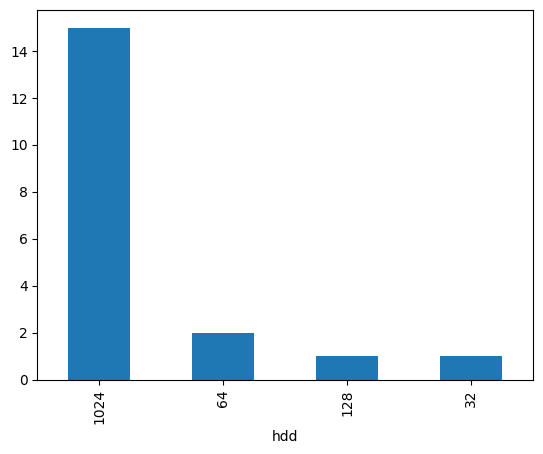

In [133]:
df[df["hdd"]!=0]["hdd"].value_counts().plot(kind="bar")

### Observations
- Max no. of laptops doesn't have hdd(779)

# 16.SSD

In [136]:
df["ssd"].isnull().sum()

0

In [137]:
df["ssd"].value_counts()

,count
ssd,
512,567
1024,158
256,48
2048,10
0,6
128,4
64,4
4096,1


<Axes: xlabel='ssd'>

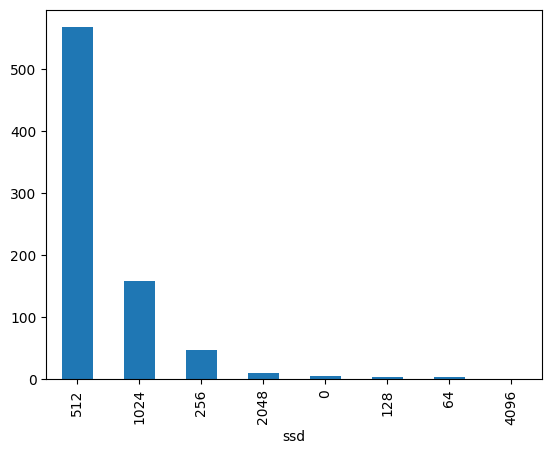

In [138]:
df["ssd"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

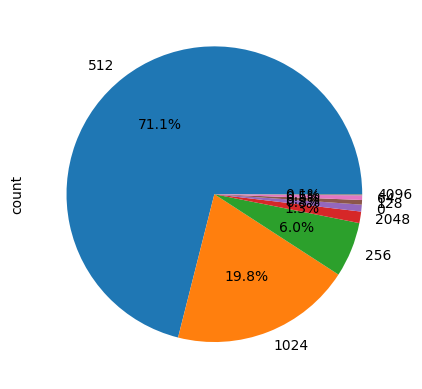

In [139]:
df["ssd"].value_counts().plot(kind="pie",autopct="%0.1f%%")


### Observations


1.   6 laptops dont have ssd
2.   71% laptops have 512gb ssd





# 17.Graphic

In [141]:
df["graphic"].isnull().sum()

0

In [143]:
vc=df["graphic"].value_counts()

<Axes: xlabel='graphic'>

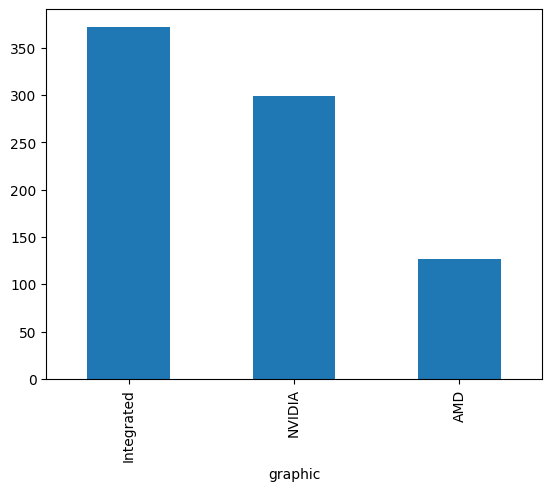

In [144]:
vc.plot(kind="bar")

<Axes: ylabel='count'>

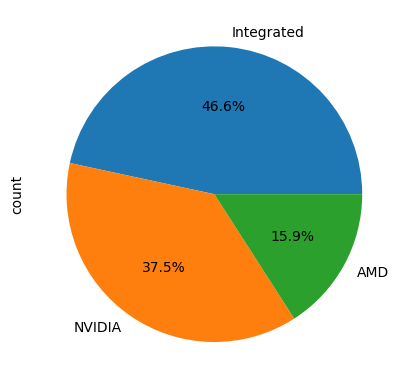

In [145]:
vc.plot(kind="pie",autopct="%0.1f%%")

### Observations


1.   Maximum no. of laptops have integrated graphic card
2.   37% have nvidia and 16% have amd



# 18.Cache

In [146]:
df["cache"].isnull().sum()

27

<Axes: xlabel='cache'>

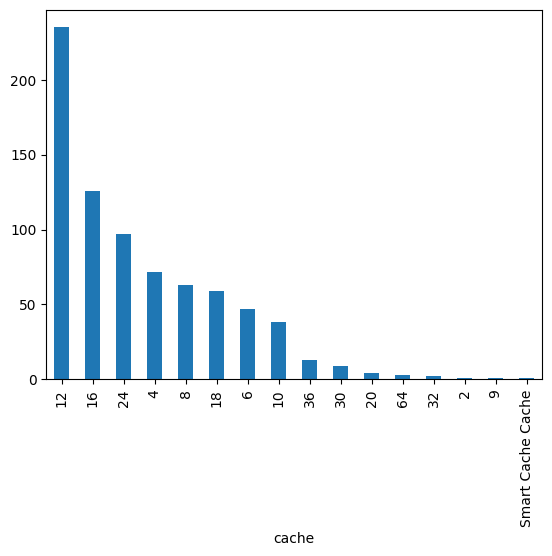

In [148]:
df["cache"].value_counts().plot(kind="bar")

In [166]:
#Here 1 value is "smart cache cache" we are going to replace it with 0
row_index=df[df["cache"]=="Smart Cache Cache"]["cache"]
df.loc[row_index.index,"cache"]=0

### Observations
- 27 values are null

# 19.Thread

In [171]:
df["thread"].isnull().sum()

20

<Axes: xlabel='thread'>

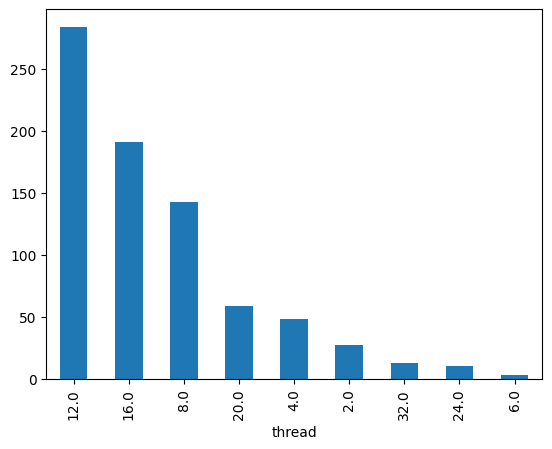

In [173]:
df["thread"].value_counts().plot(kind="bar")

### Observations
- 20 values are null

# 20.Core

In [175]:
df["core"].isnull().sum()

4

<Axes: xlabel='core'>

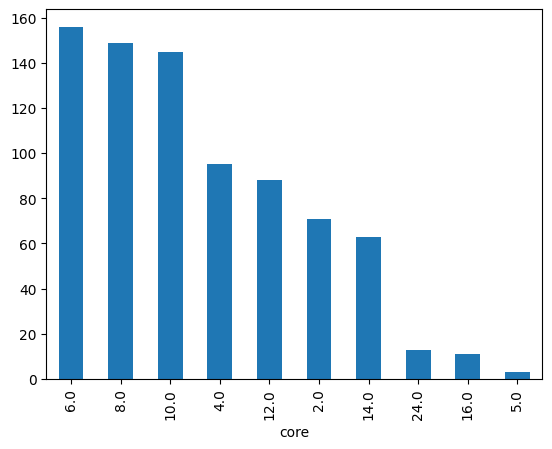

In [177]:
df["core"].value_counts().plot(kind="bar")

### Observations
- 4 values are null

# 21.Camera

In [178]:
df["camera"].isnull().sum()

769

<Axes: xlabel='camera'>

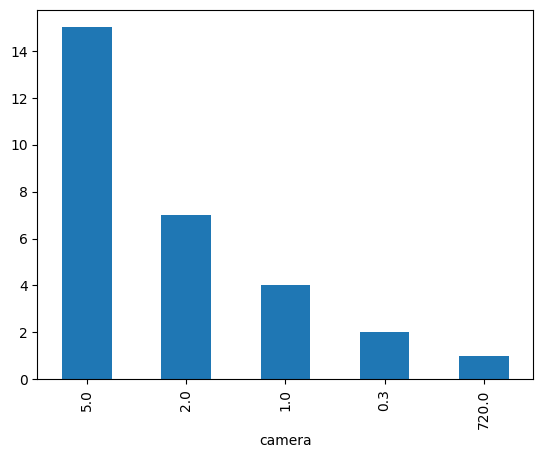

In [179]:
df["camera"].value_counts().plot(kind="bar")

### observations
- out of 798 , 769 values are null
- it is better to remove this columns

# 22.Number of cell


In [182]:
df["num_of_cell"].isnull().sum()

159

<Axes: xlabel='num_of_cell'>

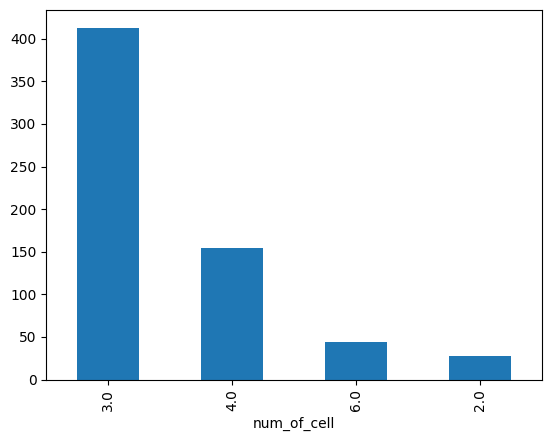

In [184]:
df["num_of_cell"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

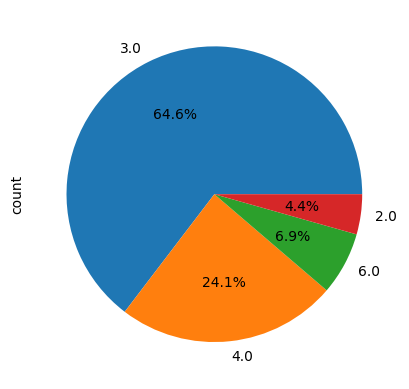

In [185]:
df["num_of_cell"].value_counts().plot(kind="pie",autopct="%0.1f%%")

### Observations
- 159 values are null
- max no. of laptops have 3 to 4 number of cells

# 23.Battery Capacity

In [186]:
df["battery_capacity"].isnull().sum()

202

In [190]:
df["battery_capacity"].describe()

,battery_capacity
count,596.000000
mean,57.002936
std,17.536492
min,6.000000
25%,45.000000
50%,52.500000
75%,68.575000
max,100.000000


<Axes: xlabel='battery_capacity', ylabel='Count'>

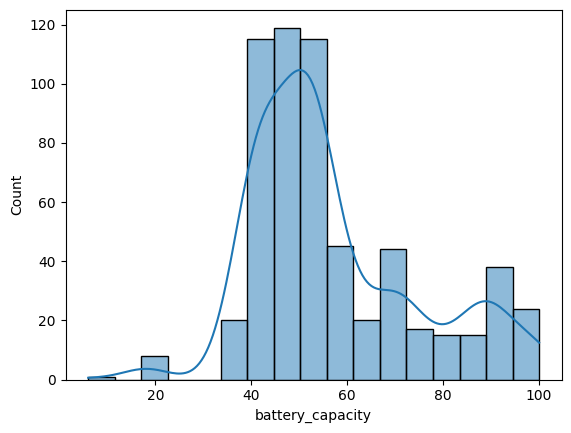

In [188]:
sns.histplot(df["battery_capacity"],kde=True)

<Axes: xlabel='battery_capacity'>

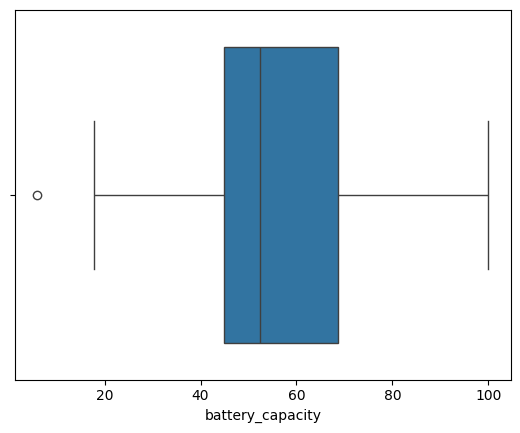

In [189]:
sns.boxplot(x=df["battery_capacity"])

In [191]:
df["battery_capacity"].skew()

0.8054991761665157

In [192]:
df["battery_capacity"].kurt()

0.10937652704983902

### observations
- 202 null values in the data
- There are no outliers in the data
- kinda follows the normal distribution
- we can divide it into categories of poor , average and good

# 24.Pixel Width

In [193]:
df["pixel_width"].isnull().sum()

1

<Axes: xlabel='pixel_width'>

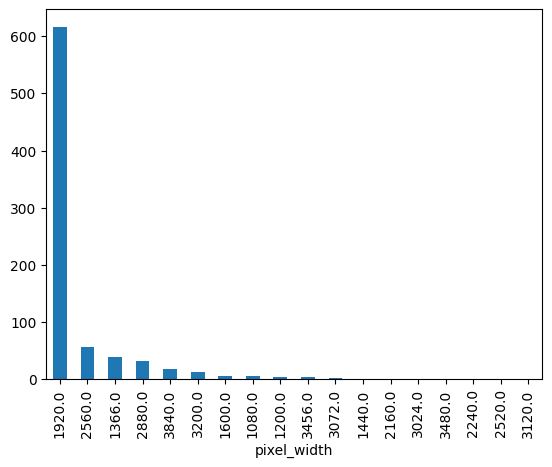

In [196]:
df["pixel_width"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

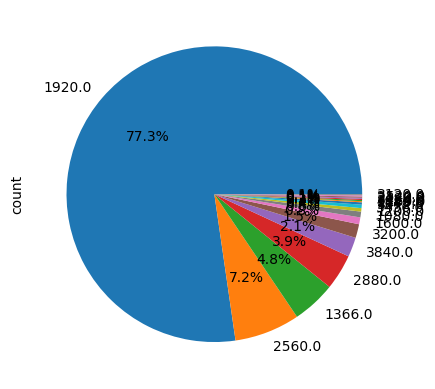

In [197]:
df["pixel_width"].value_counts().plot(  kind="pie",autopct="%0.1f%%")

### Observations
- 1 null value
- 77% laptops have 1920 pixel width

# 24.Pixel Height

In [198]:
df["pixel_height"].isnull().sum()

1

<Axes: xlabel='pixel_height'>

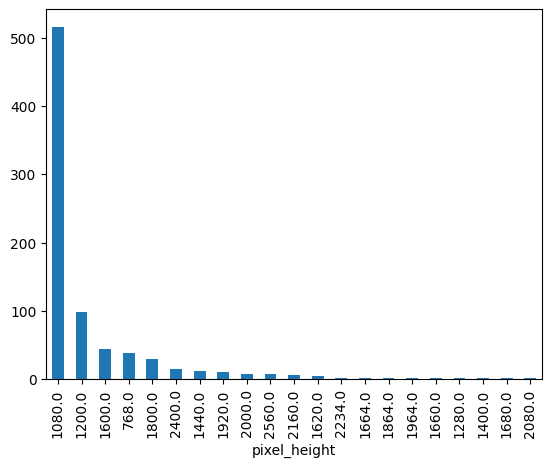

In [200]:
df["pixel_height"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

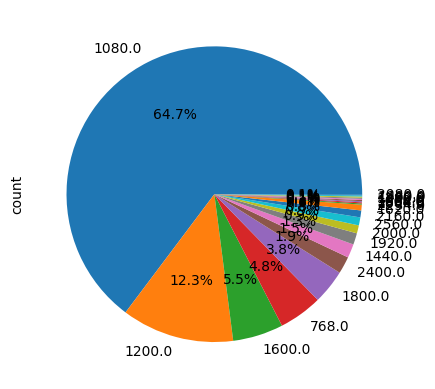

In [202]:
df["pixel_height"].value_counts().plot(  kind="pie",autopct="%0.1f%%")

### Observation
- max laptops have 1080 pixel height
- 1 null value

# 25.USB3,USB2,typec

In [205]:
col_list=["usb3","usb2","type_c"]

usb3
0


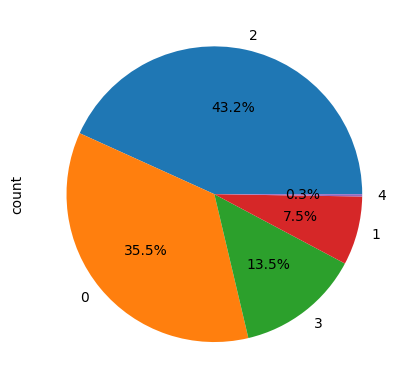

usb2
0


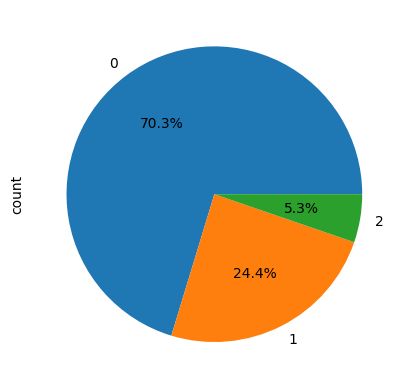

type_c
0


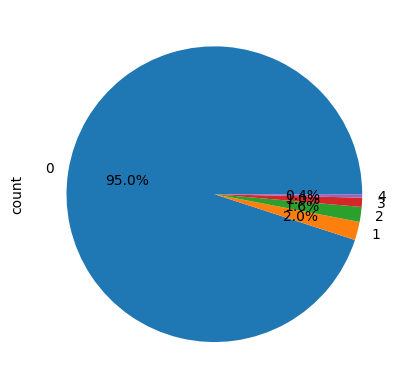

In [206]:
for i in col_list:
  df[i].value_counts().plot(kind="pie",autopct="%0.1f%%")
  print(i)
  print(df[i].isnull().sum())
  plt.show()

### Observations
- Max no. of laptops doesn't have type-c ports

# 26.Processor Brand

In [208]:
df["processor_brand"].isnull().sum()

0

<Axes: xlabel='processor_brand'>

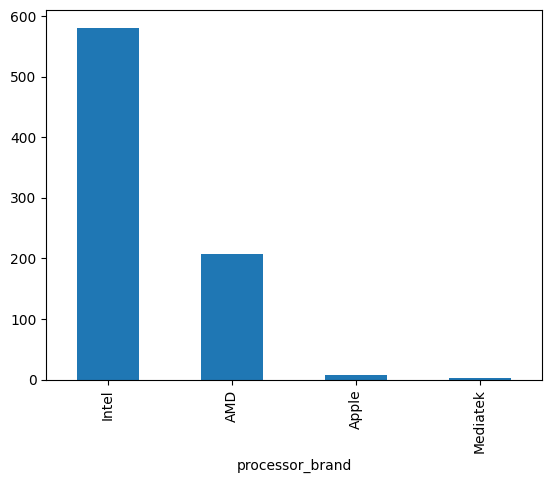

In [210]:
df["processor_brand"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

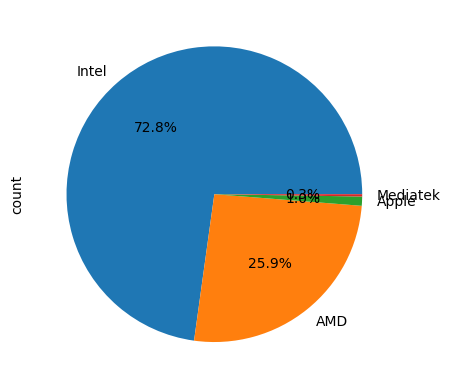

In [211]:
df["processor_brand"].value_counts().plot(kind="pie",autopct="%0.1f%%")

### Observations
- Max no. of laptops have intel processor


# 27.Processor Model

In [212]:
df["processor_model"].isnull().sum()

0

<Axes: xlabel='processor_model'>

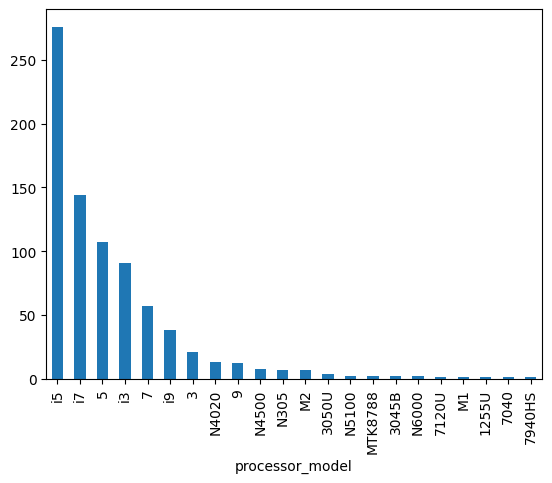

In [214]:
df["processor_model"].value_counts().plot(kind="bar")

In [219]:
df["processor_model"].value_counts().cumsum()

,count
processor_model,
i5,276
i7,420
5,527
i3,618
7,675
i9,713
3,734
N4020,747
9,759


### Observations

# 27.Processor Generation

In [220]:
df["processor_gen"].isnull().sum()

0

<Axes: xlabel='processor_gen'>

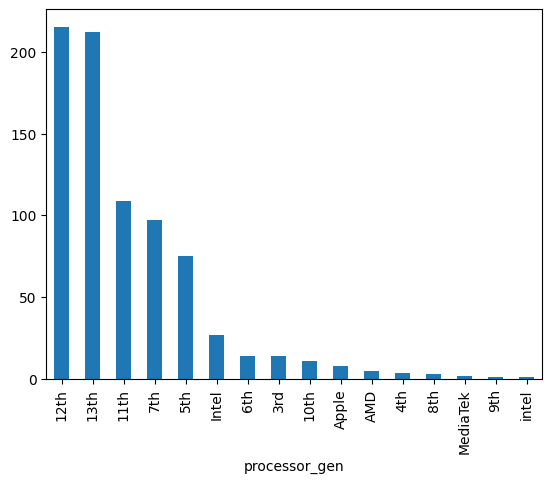

In [222]:
df["processor_gen"].value_counts().plot(kind="bar")

### Observations
- some values are absurd like [intel,apple,amd,mediatek]